Standardized X shape: (90, 83)
First 5 rows of standardized X:
 [[-1.71291154e+00 -1.94814463e-16 -6.53912840e-01 -1.57589457e+00
  -9.73440458e-01 -1.05999788e-01 -1.05999788e-01 -6.54653671e-01
  -1.05999788e-01 -5.51677284e-01  3.44342023e+00 -1.85695338e-01
  -3.33333333e-01 -1.05999788e-01 -2.42535625e-01 -4.29197538e-01
   7.97724035e-01 -5.68796459e-01 -4.10890702e-01 -4.10890702e-01
  -1.50755672e-01 -7.97724035e-01 -1.50755672e-01 -3.92232270e-01
   9.43398113e+00 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.50755672e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.50755672e-01 -1.05999788e-01 -1.50755672e-01
  -1.50755672e-01 -1.05999788e-01 -1.50755672e-01 -1.50755672e-01
  -1.0599978

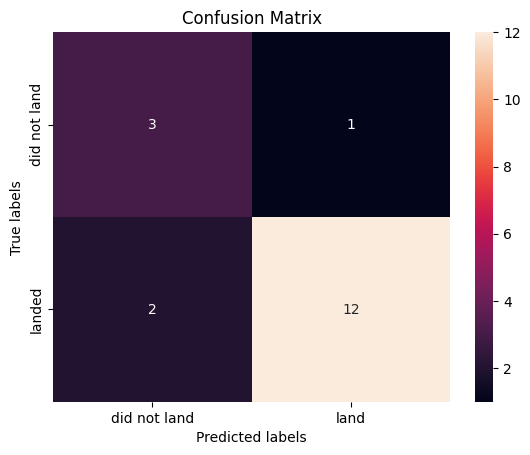

Best parameters for SVM: {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
Best cross-validation score for SVM: 0.8966666666666668
Accuracy on the test data (SVM): 0.9444


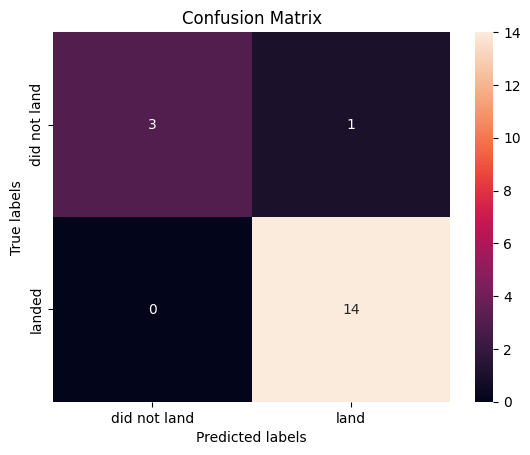

C:\Users\nteny\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nteny\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nteny\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\nteny\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\b

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Best cross-validation score for Decision Tree: 0.9333333333333333
Accuracy on the test data (Decision Tree): 0.8889


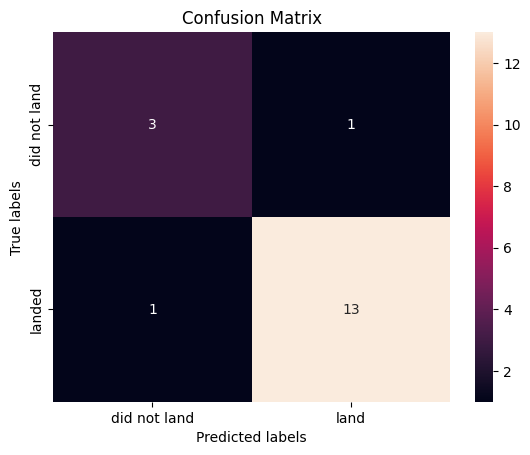

Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1}
Best cross-validation score for KNN: 0.8833333333333334
Accuracy on the test data (KNN): 0.9444


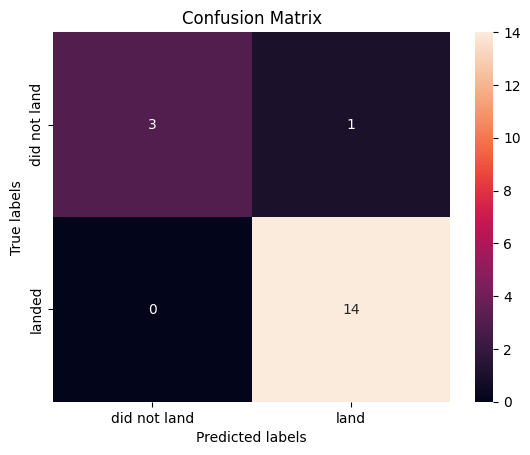

Logistic Regression Test Accuracy: 0.8333
SVM Test Accuracy: 0.9444
Decision Tree Test Accuracy: 0.8889
KNN Test Accuracy: 0.9444
The best performing model is: SVM with an accuracy of 0.9444


In [11]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import requests
from io import BytesIO

# Preprocessing and plotting functions
def plot_confusion_matrix(y, y_predict):
    """This function plots the confusion matrix"""
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)  # annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# Loading datasets using requests and io
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response1 = requests.get(URL1)
data = pd.read_csv(BytesIO(response1.content))

URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
response2 = requests.get(URL2)
X = pd.read_csv(BytesIO(response2.content))

# Creating a NumPy array from the 'Class' column
Y = data['Class'].to_numpy()

# Step 1: Standardize the data in X
transform = preprocessing.StandardScaler()
X_standardized = transform.fit_transform(X)
X = X_standardized

# Verify the transformation
print("Standardized X shape:", X.shape)
print("First 5 rows of standardized X:\n", X[:5])

# Step 2: Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

print(f"Training data shape: X_train {X_train.shape}, Y_train {Y_train.shape}")
print(f"Validation data shape: X_val {X_val.shape}, Y_val {Y_val.shape}")
print(f"Testing data shape: X_test {X_test.shape}, Y_test {Y_test.shape}")

# Step 3: Logistic Regression Model - Hyperparameter Tuning using GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters_logreg = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'max_iter': [100, 200]
}

logreg = LogisticRegression(solver='liblinear')  # Solver for smaller datasets
logreg_cv = GridSearchCV(logreg, parameters_logreg, cv=5)
logreg_cv.fit(X_train, Y_train)

# Best hyperparameters from GridSearchCV
print("Best parameters for Logistic Regression:", logreg_cv.best_params_)
print("Best cross-validation score for Logistic Regression:", logreg_cv.best_score_)

# Step 4: Evaluate the Logistic Regression Model
yhat_logreg = logreg_cv.predict(X_test)
accuracy_logreg = logreg_cv.score(X_test, Y_test)
print(f"Accuracy on the test data (Logistic Regression): {accuracy_logreg:.4f}")
plot_confusion_matrix(Y_test, yhat_logreg)

# Step 5: Support Vector Machine (SVM) - Hyperparameter Tuning with GridSearchCV
from sklearn.svm import SVC

parameters_svm = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

svm = SVC()
svm_cv = GridSearchCV(svm, parameters_svm, cv=10)
svm_cv.fit(X_train, Y_train)

# Best hyperparameters from GridSearchCV
print("Best parameters for SVM:", svm_cv.best_params_)
print("Best cross-validation score for SVM:", svm_cv.best_score_)

# Step 6: Evaluate the SVM Model
yhat_svm = svm_cv.predict(X_test)
accuracy_svm = svm_cv.score(X_test, Y_test)
print(f"Accuracy on the test data (SVM): {accuracy_svm:.4f}")
plot_confusion_matrix(Y_test, yhat_svm)

# Step 7: Decision Tree Classifier - Hyperparameter Tuning with GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parameters_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2 * n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters_tree, cv=10)
tree_cv.fit(X_train, Y_train)

# Best hyperparameters from GridSearchCV
print("Best parameters for Decision Tree:", tree_cv.best_params_)
print("Best cross-validation score for Decision Tree:", tree_cv.best_score_)

# Step 8: Evaluate the Decision Tree Model
yhat_tree = tree_cv.predict(X_test)
accuracy_tree = tree_cv.score(X_test, Y_test)
print(f"Accuracy on the test data (Decision Tree): {accuracy_tree:.4f}")
plot_confusion_matrix(Y_test, yhat_tree)

# Step 9: K-Nearest Neighbors (KNN) - Hyperparameter Tuning with GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters_knn = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters_knn, cv=10)
knn_cv.fit(X_train, Y_train)

# Best hyperparameters from GridSearchCV
print("Best parameters for KNN:", knn_cv.best_params_)
print("Best cross-validation score for KNN:", knn_cv.best_score_)

# Step 10: Evaluate the KNN Model
yhat_knn = knn_cv.predict(X_test)
accuracy_knn = knn_cv.score(X_test, Y_test)
print(f"Accuracy on the test data (KNN): {accuracy_knn:.4f}")
plot_confusion_matrix(Y_test, yhat_knn)

# Step 11: Compare the performance of all models

# Logistic Regression accuracy
logreg_accuracy = logreg_cv.score(X_test, Y_test)
print(f"Logistic Regression Test Accuracy: {logreg_accuracy:.4f}")

# SVM accuracy
svm_accuracy = svm_cv.score(X_test, Y_test)
print(f"SVM Test Accuracy: {svm_accuracy:.4f}")

# Decision Tree accuracy
tree_accuracy = tree_cv.score(X_test, Y_test)
print(f"Decision Tree Test Accuracy: {tree_accuracy:.4f}")

# KNN accuracy
knn_accuracy = knn_cv.score(X_test, Y_test)
print(f"KNN Test Accuracy: {knn_accuracy:.4f}")

# Find the best performing model
best_model = max([("Logistic Regression", logreg_accuracy),
                  ("SVM", svm_accuracy),
                  ("Decision Tree", tree_accuracy),
                  ("KNN", knn_accuracy)], key=lambda x: x[1])

print(f"The best performing model is: {best_model[0]} with an accuracy of {best_model[1]:.4f}")
